In [1]:
import warnings
warnings.filterwarnings("ignore")

   # COURSE PROJECT : 
## Predicting Final Grades from Student Data

#### Group name: 
- Group_1

#### Group Members:
- Omer Yalavac  - s3849677
- Vincent Tang - s3645447
- Rhyme Bulbul - s3850912

# Introduction 

The objective of this project is to predict the final grade of students using multiple linear regression on a dataset of  student achievement in two Portuguese schools. We use the Statsmodels and Patsy modules for this task with Python version >= 3.8. The dataset was sourced from the UCI Machine Learning Repository at http://archive.ics.uci.edu/ml/datasets/Student+Performance (FUBUTEC 2008). This report is organized as follows: 

- [Overview](#Overview) section describes the dataset used and the features in this dataset.

- [Data Preparation](#Preparation) section covers data cleaning and data preparation steps. 

- [Data Exploration](#Exploration) section explores dataset features and their inter-relationships.

- [Statistical Modeling & Performance Evaluation](#Modeling)  section first fits a full multiple linear regression model and performs diagnostic checks. Next, we perform backwards variable selection using p-values to obtain a reduced model, after which we perform another set of diagnostic checks on the reduced model.

- [Summary & Conclusions](#Conclusions) section provides a summary of our work and presents our findings.

# Overview <a name="Overview"></a>

### Data Source

Our dataset contains data on the achievement of students in secondary education of two Portuguese schools. The dataset was collected from http://archive.ics.uci.edu/ml/datasets/Student+Performance, using `student-por.csv`.
Our dataset has 649 instances, with 33 attributes, which can be verified with <code>df.dtypes</code>.

In [2]:
import pandas as pd

df = pd.read_csv('student-por.csv', sep=';')
pd.set_option('display.max_columns', None)

Our dataset was only one column of data including the column title with only the semi-colon (;) symbol seperating values, and so it needed to be seperated when being read in order to create the seperate columns with their respective row values using 
```
sep = ';'
```
---
This is how our dataset currently looks:

In [3]:
df.sample(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
9,GP,M,15,U,GT3,T,3,4,other,other,home,mother,1,2,0,no,yes,no,yes,yes,yes,yes,no,5,5,1,1,1,5,0,12,12,13
252,GP,F,16,U,GT3,A,4,1,other,other,home,mother,1,2,0,no,no,no,yes,yes,yes,yes,yes,5,3,3,1,2,5,0,14,13,13
520,MS,F,16,U,LE3,T,1,1,at_home,other,other,mother,3,2,0,no,yes,no,no,yes,yes,yes,no,4,3,2,1,3,5,6,6,8,8
432,MS,F,17,R,GT3,T,1,1,other,other,other,father,1,1,1,no,yes,no,no,no,no,yes,no,5,4,4,2,2,5,0,6,6,7
636,MS,M,18,U,GT3,T,4,4,teacher,teacher,home,father,1,2,0,no,no,no,yes,no,yes,yes,no,3,2,4,1,4,2,4,17,18,19
47,GP,M,16,U,GT3,T,4,3,health,services,reputation,mother,1,4,0,no,no,no,yes,yes,yes,yes,no,4,2,2,1,1,2,2,17,17,17
346,GP,M,17,U,LE3,T,4,4,other,teacher,home,father,2,1,0,no,no,no,no,yes,yes,yes,no,4,1,1,2,2,5,0,12,13,13
212,GP,F,17,U,GT3,T,4,4,services,teacher,home,mother,2,1,1,no,yes,no,no,yes,yes,yes,no,4,2,4,2,3,2,30,14,15,16
606,MS,F,17,U,GT3,T,4,2,teacher,other,course,father,2,4,0,no,no,no,no,yes,yes,yes,yes,4,2,3,3,1,5,0,18,18,18
501,MS,M,16,U,LE3,T,4,3,other,other,course,father,1,1,0,no,no,no,yes,yes,yes,yes,no,4,2,5,1,5,5,8,14,12,13


### Project Objective

Our goal is to predict our target feature, <code>G3</code>, within an acceptable margin of error using linear regression. 

### Target Feature

Our target feature is <code>G3</code> , which is a discrete numerical feature, and represents the students final grade for a specific course project (Math or Portuguese).

### Descriptive Features

The variable descriptions below are from the <code>student-por</code> file:

- <code>school</code>- student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
- <code>sex</code> - student's sex (binary: 'F' - female or 'M' - male)
- <code>age</code> - student's age (numeric: from 15 to 22)
- <code>address</code> - student's home address type (binary: 'U' - urban or 'R' - rural)
- <code>famsize</code> - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
- <code>Pstatus</code> - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
- <code>Medu</code> - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)
- <code>Fedu</code> - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)
- <code>Mjob</code> - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
- <code>Fjob</code> - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
- <code>reason</code> - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
- <code>guardian</code> - student's guardian (nominal: 'mother', 'father' or 'other')
- <code>traveltime</code> - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
- <code>studytime</code> - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
- <code>failures</code> - number of past class failures (numeric: n if 1<=n<3, else 4)
- <code>schoolsup</code> - extra educational support (binary: yes or no)
- <code>famsup</code> - family educational support (binary: yes or no)
- <code>paid</code> - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
- <code>activities</code> - extra-curricular activities (binary: yes or no)
- <code>nursery</code> - attended nursery school (binary: yes or no)
- <code>higher</code> - wants to take higher education (binary: yes or no)
- <code>internet</code> - Internet access at home (binary: yes or no)
- <code>romantic</code> - with a romantic relationship (binary: yes or no)
- <code>famrel</code> - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
- <code>freetime</code> - free time after school (numeric: from 1 - very low to 5 - very high)
- <code>goout</code> - going out with friends (numeric: from 1 - very low to 5 - very high)
- <code>Dalc</code> - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
- <code>Walc</code> - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
- <code>health</code> - current health status (numeric: from 1 - very bad to 5 - very good)
- <code>absences</code> - number of school absences (numeric: from 0 to 93) 

### these grades are related with the course subject, Math or Portuguese:
- <code>G1</code> - first period grade (numeric: from 0 to 20)
- <code>G2</code> - second period grade (numeric: from 0 to 20)
- <code>G3</code> - final grade (numeric: from 0 to 20, output target)

### Feature Set

Inspection of the feature descriptions from the <code>student-por</code> file allows the removal of features that represent similar data or deemed to have low predictive power.

For instance, features <code>freetime</code> and <code>goout</code> are deemed to represent similar data, thus feature <code>goout</code> is removed preliminarily. 

A description of each feature that we will be using in our dataset is presented below in a table format:


|name   |datatype   |units   |description   |
|---|---|---|---|
|school   |binary   |'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira   |Student's school   |
|sex   |binary   |binary: 'F' - female or 'M' - male   |Student's gender   |
|address   |binary   |'U' - urban or 'R' - rural   |Student's address (urban/rural)   |
|Medu   |numeric   |0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education   |Highest education achieved by student's mother   |
|Fedu   |numeric   |0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education   |Highest education achieved by student's father   |
|traveltime   |numeric   |1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour   |Time spent travelling to and from school   |
|studytime   |numeric   |1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours   | Time spent studying over a week  |
|failures   |numeric   |n if 1<=n<3, else 4   |Student's total number of past class failures  |
|schoolsup   |binary   |yes/no   |Extra educational support from the school   |
|famsup   |binary   |yes/no   |Extra educational support from the family   |
|paid   |binary   |yes/no   |Extra tutoring classes for Math/Portuguese   |
|higher   |binary   |yes/no   |Student's intention of higher education post -high school  |
|internet   |binary   |yes/no   |Student's access to internet from home   |
|famrel   |numeric   |1-5   |Quality of Student's relationships with his/her family  |
|freetime   |numeric   |1-5   |Amount of free time student has after school   |
|health   |numeric   |1-5   |Current health status   |
|absences   |numeric   |0-93   |Total number of school absences   |
|G3   |numeric   |0-20   |Final grade   |

# Data Preparation <a name="Preparation"></a>

## Preliminaries

In [4]:
# Importing modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import patsy
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

## Data Cleaning and Transformation

In [5]:
print(f"Shape of the dataset is {df.shape} \n")
print(f"Data types are below where 'object' indicates a string type: ")
print(df.dtypes)

Shape of the dataset is (649, 33) 

Data types are below where 'object' indicates a string type: 
school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object


---
Since our response variable is the final grade (G3), we do not need data on the first two periods so we will remove them:

In [6]:
df = df.drop(['G1', 'G2'], axis = 1)

---
- The student's age is irrelevant information as the range is too small for there to be any significant impact to the student's final age 
- The parent's cohabitation status, parent's job, and the reason for selecting the school the student attends, provides little to no value to our dataset, hence we will remove them. 
- The guardian of the student would only be relevant if the parents were apart, and considering that not all student's parents are apart, we will also remove this. 
- The columns: freetime, studytime, traveltime, goout, and activities all refer to how time was spent outside of school hours. Since we dont need all the specific details of time spent outside of school hours, only keeping freetime, traveltime and studytime would give us all the information we need.
- Weather a student attended nursery school or not would be relevant to their current grades, especially if they're receiving school support, family support and/or paid extra classes.

In [7]:
df = df.drop(['age', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'goout', 'activities', 'nursery'], axis = 1)

---
Workday alcohol consumption (Dalc) and weekend alcohol consumption (Walc) can be added together to create weekly alcohol consumption (Wkalc), a rating out of 10 (from 0-very low to 8-very high):

In [8]:
df['Wkalc'] = df['Walc'] + df['Dalc'] - 2
df = df.drop(columns=['Walc', 'Dalc'])
df['Wkalc'].describe()

count    649.000000
mean       1.782743
std        1.992411
min        0.000000
25%        0.000000
50%        1.000000
75%        3.000000
max        8.000000
Name: Wkalc, dtype: float64

### Fixing numerical variables that don't begin with 0:

Our model would make a lot more sense if our numerical variables (eg: famrel is a rating between 1 and 5) began with 0 instead of 1. If variables began with 0, our equation for our data model would be a lot more simplified and our intersept can then be explained as the expected age without the influence of the other variables. 

Such variables are:
- traveltime
- studytime
- famrel
- freetime
- health

In [9]:
df['traveltime'] = df['traveltime'] - 1
df['studytime'] = df['studytime'] - 1
df['famrel'] = df['famrel'] - 1
df['freetime'] = df['freetime'] - 1
df['health'] = df['health'] - 1

### Discretising very large ranged numerical variables:

We will check the variable `absences` using the `value_counts` method in Pandas.

In [10]:
df['absences'].value_counts().sort_index()

0     244
1      12
2     110
3       7
4      93
5      12
6      49
7       3
8      42
9       7
10     21
11      5
12     12
13      1
14      8
15      2
16     10
18      3
21      2
22      2
24      1
26      1
30      1
32      1
Name: absences, dtype: int64

Let's save a copy of `df['absences']` to `absences` just in case we need to visualise the unmodified data at another time.

In [11]:
absences = df['absences'].copy()

Since the range is such a large value in the variable `absences`, we would need to discretise the data into bins for it to have more of a significant impact on the model. 

In [12]:
df['absences'] = pd.cut(df['absences'], bins = 5, labels=['very low', 'low', 'medium', 'high', 'very high'])

Let's see how our values look now using the `value_counts` method in Pandas.

In [13]:
df['absences'].value_counts()

very low     527
low           90
medium        24
high           5
very high      3
Name: absences, dtype: int64

It seems perfect. Let's now perform integer encoding such that *very low* is 0, *low* is 1, *medium* is 2, *high* is 3 and *very high* is 4.

In [14]:
level_mapping = {'very low': 0, 'low': 1, 'medium': 2, 'high': 3, 'very high': 4}
df['absences'] = df['absences'].replace(level_mapping)

df.sample(5)

,school,sex,address,famsize,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,higher,internet,romantic,famrel,freetime,health,absences,G3,Wkalc
108,GP,M,R,GT3,4,4,3,3,0,no,yes,no,yes,yes,yes,0,2,0,1,11,6
647,MS,M,U,LE3,3,1,1,0,0,no,no,no,yes,yes,no,1,3,1,0,10,5
431,MS,F,R,GT3,3,2,0,1,1,no,no,no,yes,no,yes,3,4,4,0,10,1
402,GP,F,U,GT3,4,3,0,2,0,no,yes,no,yes,yes,yes,3,3,3,0,13,2
511,MS,F,U,GT3,1,0,1,1,0,no,no,no,yes,yes,yes,3,3,3,0,10,0


## Checking for Missing Values

In [15]:
print(f"\nNumber of missing values for each feature:")
print(df.isnull().sum())


Number of missing values for each feature:
school        0
sex           0
address       0
famsize       0
Medu          0
Fedu          0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
health        0
absences      0
G3            0
Wkalc         0
dtype: int64


**No missing attributes for any of the features** so no need to remove any rows.

In [16]:
print(f'Now the number of columns are {df.shape[1]}. The dataset currently looks like:')
df.head()

Now the number of columns are 21. The dataset currently looks like:


,school,sex,address,famsize,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,higher,internet,romantic,famrel,freetime,health,absences,G3,Wkalc
0,GP,F,U,GT3,4,4,1,1,0,yes,no,no,yes,no,no,3,2,2,0,11,0
1,GP,F,U,GT3,1,1,0,1,0,no,yes,no,yes,yes,no,4,2,2,0,11,0
2,GP,F,U,LE3,1,1,0,1,0,yes,no,no,yes,yes,no,3,2,2,0,12,3
3,GP,F,U,GT3,4,2,0,2,0,no,yes,no,yes,yes,yes,2,1,4,0,14,0
4,GP,F,U,GT3,3,3,0,1,0,no,yes,no,yes,no,no,3,2,4,0,13,1


## Summary Statistics

In [17]:
from IPython.display import display, HTML
display(HTML('<b>Table 1: Summary of continuous features</b>'))
df.describe(include='int64')

,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,health,absences,G3,Wkalc
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,2.514638,2.306626,0.568567,0.930663,0.221880,2.930663,2.180277,2.536210,0.254237,11.906009,1.782743
std,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.446259,0.604830,3.230656,1.992411
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,0.000000,0.000000,0.000000,3.000000,2.000000,1.000000,0.000000,10.000000,0.000000
50%,2.000000,2.000000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,12.000000,1.000000
75%,4.000000,3.000000,1.000000,1.000000,0.000000,4.000000,3.000000,4.000000,0.000000,14.000000,3.000000
max,4.000000,4.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,19.000000,8.000000


In [18]:
display(HTML('<b>Table 2: Summary of categorical features</b>'))
df.describe(include='object')

,school,sex,address,famsize,schoolsup,famsup,paid,higher,internet,romantic
count,649,649,649,649,649,649,649,649,649,649
unique,2,2,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,no,yes,no,yes,yes,no
freq,423,383,452,457,581,398,610,580,498,410


# Data Exploration <a name="Exploration"></a>

## Numerical features

### Searching for Outliers

We will check if any of the numerical features have any outliers based on `Table 1: Summary of continuous features`.

- Medu is expected to contain values between `0 to 4`. Based on Table 1, the minimum is `0` and the maximum is `4` and, hence, contains `no outliers`.
- Fedu is expected to contain values between `0 to 4`. Based on Table 1, the minimum is `0` and the maximum is `4` and, hence, contains `no outliers`.
- traveltime is expected to contain values between `0 to 3`. Based on Table 1, the minimum is `0` and the maximum is `3` and, hence, contains `no outliers`.
- studytime is expected to contain values between `0 to 3`. Based on Table 1, the minimum is `0` and the maximum is `3` and, hence, contains `no outliers`.
- failures is expected to contain values between `0 to 4`. Based on Table 1, the minimum is `0` and the maximum is `3` and, hence, contains `no outliers`.
- famrel is expected to contain values between `0 to 4`. Based on Table 1, the minimum is `0` and the maximum is `4` and, hence, contains `no outliers`.
- freetime is expected to contain values between `0 to 4`. Based on Table 1, the minimum is `0` and the maximum is `4` and, hence, contains `no outliers`.
- health is expected to contain values between `0 to 4`. Based on Table 1, the minimum is `0` and the maximum is `4` and, hence, contains `no outliers`.
- absences is expected to contain values between `0 to 4`. Based on Table 1, the minimum is `0` and the maximum is `4` and, hence, contains `no outliers`.
- G3 is expected to contain values between `0 to 20`. Based on Table 1, the minimum is `0` and the maximum is `19` and, hence, contains `no outliers`.
- Wkalc is expected to contain values between `0 to 8`. Based on Table 1, the minimum is `0` and the maximum is `8` and, hence, contains `no outliers`.

## Catagorical Features

In [19]:
categoricalColumns = df.columns[df.dtypes==object].tolist()

for col in categoricalColumns:
    print('Unique values for ' + col)
    print(df[col].unique())
    print('')

Unique values for school
['GP' 'MS']

Unique values for sex
['F' 'M']

Unique values for address
['U' 'R']

Unique values for famsize
['GT3' 'LE3']

Unique values for schoolsup
['yes' 'no']

Unique values for famsup
['no' 'yes']

Unique values for paid
['no' 'yes']

Unique values for higher
['yes' 'no']

Unique values for internet
['no' 'yes']

Unique values for romantic
['no' 'yes']



Each catagorical feature contains only two unique values each, such as 'yes' or 'no'.

It seems like no accidental symbol, such as a full stop (.) is in any of the rows for any of the catagorical columns, so we dont need to use:
```
df['column_name'].str.rstrip(".")
``` 

We can now consider our dataset 'clean' & ready for visualisation & data modelling.

## Univariate Visualisation

Lets get a histogram of Study time & Travel times.

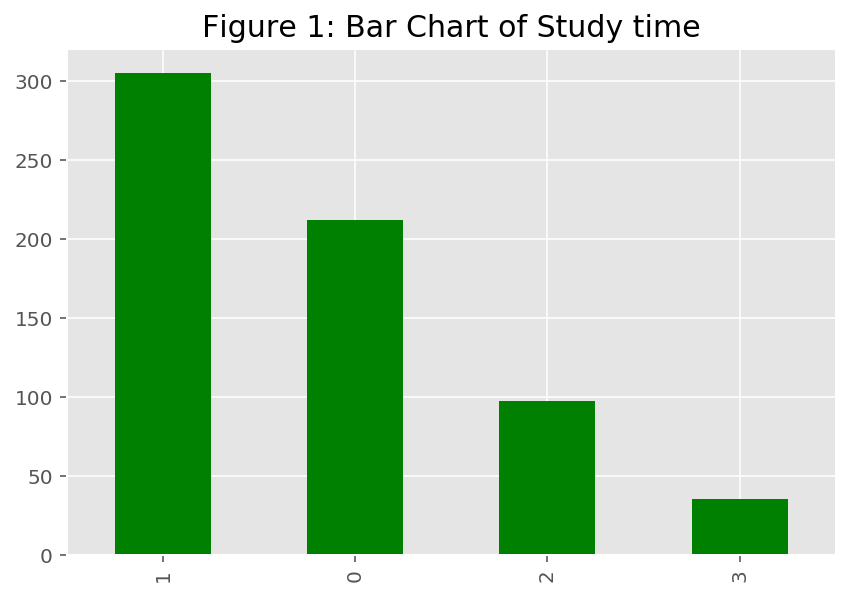

In [20]:
ax = df['studytime'].value_counts().plot(kind = 'bar', color = 'green')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.tight_layout()
plt.title('Figure 1: Bar Chart of Study time', fontsize = 15)
plt.show();

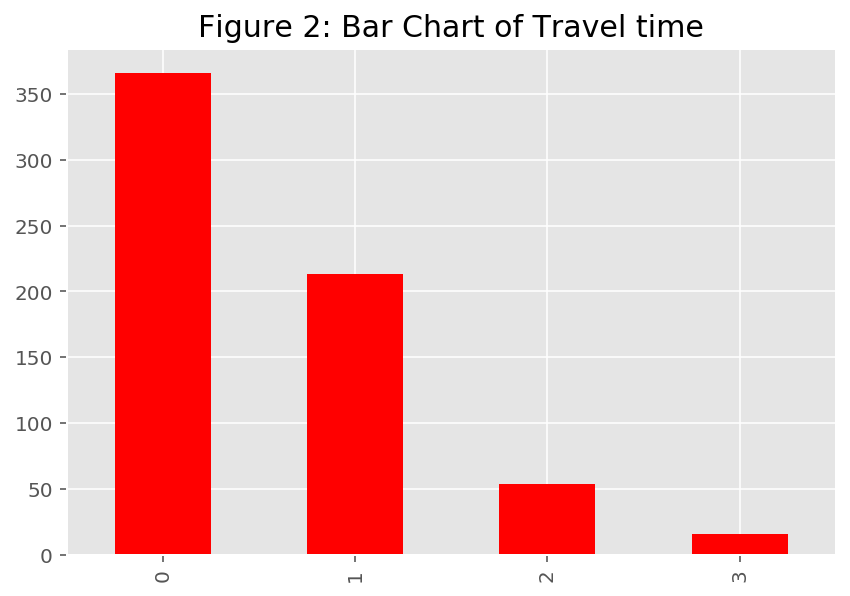

In [21]:
ax = df['traveltime'].value_counts().plot(kind = 'bar', color = 'red')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.tight_layout()
plt.title('Figure 2: Bar Chart of Travel time', fontsize = 15)
plt.show();

Let's display a boxplot and histogram for Final Grades. Figure 3 shows that this variable is left-skewed. 

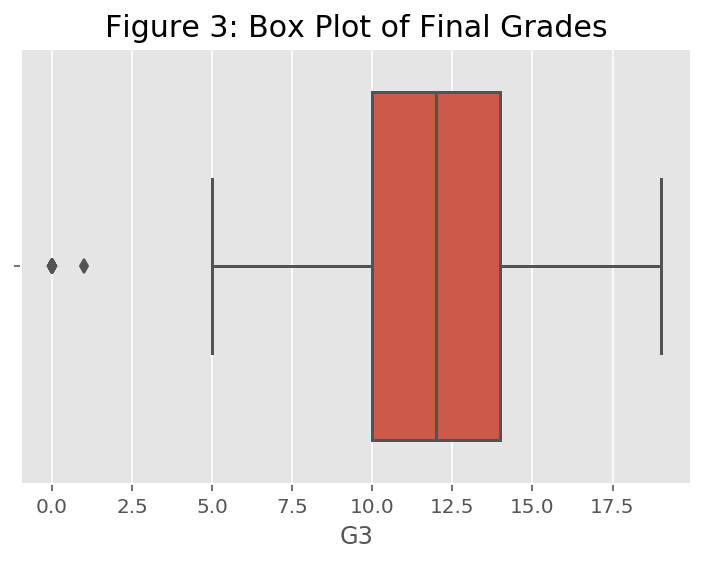

In [22]:
# get a box plot of final grades 
sns.boxplot(df['G3']).set_title('Figure 3: Box Plot of Final Grades', fontsize = 15)
plt.show();

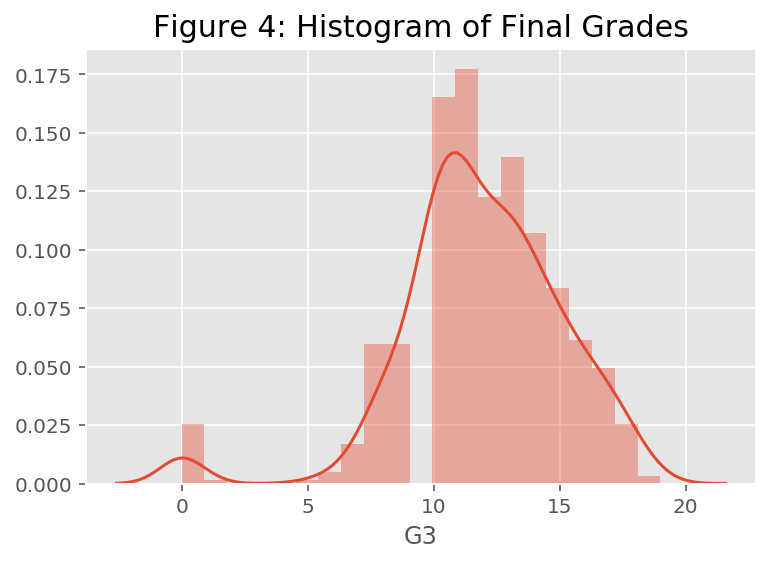

In [23]:
# get a histogram of age with kernel density estimate
sns.distplot(df['G3'], kde = True).set_title('Figure 4: Histogram of Final Grades', fontsize = 15)
plt.show();

## Multivariate Visualisation

### Scatterplot of Numerical Features & Final Grades

We will make a scatterplot between absences and final grades using the `absences` from the copy of the unmodified dataframe.

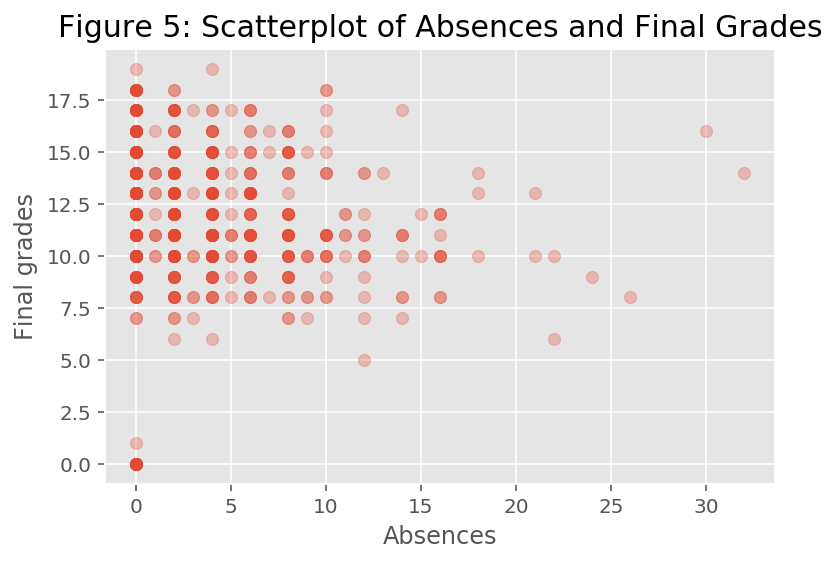

In [24]:
plt.scatter(absences, df['G3'], alpha = 0.3)
plt.title('Figure 5: Scatterplot of Absences and Final Grades', fontsize = 15)
plt.xlabel('Absences')
plt.ylabel('Final grades')
plt.show();

The scatterplot in Figure 5 shows no clear correlation between the absences and final grades numeric variables. 

### Catagorical attributes by Final Grades

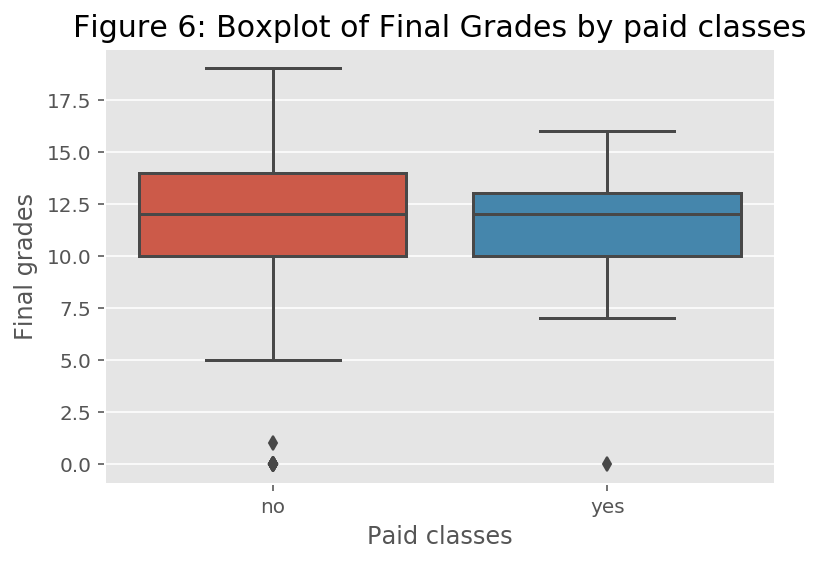

In [25]:
# Creating a boxplot
sns.boxplot(df['paid'], df['G3']);
plt.title('Figure 6: Boxplot of Final Grades by paid classes', fontsize = 15)
plt.xlabel('Paid classes')
plt.ylabel('Final grades')
plt.show();

The distribution of students taking paid classes and those that aren't does not differ significantly, but have a similiar median as seen in `Figure 6`. The whiskers suggest that students with a final grade of over 16 are more likely to not be involved in any sort of paid classes.

# Statistical Modeling & Performance Evaluation <a name="Modeling"></a>

## Full Model

We begin by fitting a multiple linear regression that predicts final grades using all of the avaliable features. We call this the full model. First let's take a quick peak at the clean data.

In [26]:
df.sample(10)

,school,sex,address,famsize,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,higher,internet,romantic,famrel,freetime,health,absences,G3,Wkalc
461,MS,F,R,GT3,1,1,1,0,0,no,no,no,yes,yes,yes,3,1,1,0,14,5
104,GP,M,U,GT3,3,4,0,1,0,no,yes,no,yes,yes,no,4,3,0,0,16,0
241,GP,M,U,LE3,2,3,0,1,0,no,yes,no,yes,yes,no,4,2,2,0,11,2
635,MS,F,R,GT3,3,1,0,1,0,no,yes,no,yes,yes,no,3,4,0,1,9,3
295,GP,M,U,LE3,4,3,0,1,0,no,yes,no,yes,yes,no,3,2,0,0,14,0
331,GP,M,U,GT3,1,1,0,1,0,no,no,no,yes,yes,no,3,2,3,0,12,1
352,GP,M,R,GT3,3,3,0,1,0,no,no,no,yes,no,yes,3,4,4,0,11,1
52,GP,M,U,LE3,4,2,1,0,0,no,no,no,yes,no,no,4,4,4,0,9,5
348,GP,F,U,GT3,4,2,1,2,0,no,yes,no,yes,yes,no,3,2,2,0,16,0
517,MS,F,R,LE3,1,2,1,0,0,no,no,no,yes,yes,no,4,3,1,0,15,3


When constructing the regression formula, we can manually add all the independent features.

In [27]:
dependant_var = 'G3'
independant_var = ' + '.join(df.drop(columns=['G3']).columns)
formula_string = dependant_var + ' ~ ' + independant_var
print('formula_string: ', formula_string)

formula_string:  G3 ~ school + sex + address + famsize + Medu + Fedu + traveltime + studytime + failures + schoolsup + famsup + paid + higher + internet + romantic + famrel + freetime + health + absences + Wkalc


The formula string above works just fine with the Statsmodels module. The problem, however, is that we cannot do automatic variable selection with this formula. What we need for this purpose is "one-hot-encoding" of categorical features. 

In the code chunk below, we first use the get_dummies() function in Pandas for one-hot-encoding of categorical features and then we construct a new formula string with the encoded features.

In [28]:
data_encoded = pd.get_dummies(df, drop_first=True)
data_encoded.head()

,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,health,absences,G3,Wkalc,school_MS,sex_M,address_U,famsize_LE3,schoolsup_yes,famsup_yes,paid_yes,higher_yes,internet_yes,romantic_yes
0,4,4,1,1,0,3,2,2,0,11,0,0,0,1,0,1,0,0,1,0,0
1,1,1,0,1,0,4,2,2,0,11,0,0,0,1,0,0,1,0,1,1,0
2,1,1,0,1,0,3,2,2,0,12,3,0,0,1,1,1,0,0,1,1,0
3,4,2,0,2,0,2,1,4,0,14,0,0,0,1,0,0,1,0,1,1,1
4,3,3,0,1,0,3,2,4,0,13,1,0,0,1,0,0,1,0,1,0,0


In [29]:
formula_string_indep_vars_encoded = ' + '.join(data_encoded.drop(columns='G3').columns)
formula_string_encoded = 'G3 ~ ' + formula_string_indep_vars_encoded
print('formula_string_encoded: ', formula_string_encoded)

formula_string_encoded:  G3 ~ Medu + Fedu + traveltime + studytime + failures + famrel + freetime + health + absences + Wkalc + school_MS + sex_M + address_U + famsize_LE3 + schoolsup_yes + famsup_yes + paid_yes + higher_yes + internet_yes + romantic_yes


Now that we have defined our statistical model formula as a Python string, we fit an OLS (ordinary least squares) model to our encoded data.

In [30]:
model = sm.formula.ols(formula = formula_string_encoded, data = data_encoded)
model_fitted = model.fit()
print(model_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.318
Method:                 Least Squares   F-statistic:                     16.10
Date:                Sun, 01 Nov 2020   Prob (F-statistic):           2.13e-44
Time:                        19:19:37   Log-Likelihood:                -1547.2
No. Observations:                 649   AIC:                             3136.
Df Residuals:                     628   BIC:                             3230.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        10.6367      0.697     15.265

The equation of the regression model that includes all of the variables rounded to two decimal places is: <br> 10.64 + (0.14 * Medu) + (0.21 * Fedu) + (0.06 * traveltime) + (0.43 * studytime) + (-1.29 * failures) + (0.12 * famrel) + (-0.13 * freetime) + (-0.17 * health) + (-0.32 * absences) + (-0.15 * Walc) + (-1.36 * School_MS) + (-0.57 * sex_M) + (0.28 * address_U) + (0.29 * famsize_LE3) + (-1.42 * schoolsup_yes) + (-0.01 * famsup_yes) + (-0.53 * paid_yes) + (1.67 * higher_yes) + (0.37 * internet_yes) + (-0.37 * romantic_yes) 

The intercept in this case, in simple terms, refers to the expected final grade if everything else was 0, such as all of the nominal catagorical features are all 'no' (eg: famsup_yes = 0). <br>Overall, a student is expected to receive 10.6367 as their final grade if their mother and father has no education, home to school travel time is less than 15 minutes, study time is less than 2 hours, they have 0 previous failures, their family relationship is very bad, freetime afterschool is very low, their current health status is very bad, their absences from school is very low, weekly alcohol consumption is very low, they attend Gabriel Pereira school, are females, live in rural areas, have a family size greater than 3, receive no school support, no family support, no extra paid classes, does not want to go into higher education, does not have internet and is not in a romantic relationship.

In [31]:
residuals_full = pd.DataFrame({'actual': df['G3'], 
                            'predicted': model_fitted.fittedvalues, 
                            'residual': model_fitted.resid})
residuals_full.head(10)

,actual,predicted,residual
0,11,12.800059,-1.800059
1,11,13.587117,-2.587117
2,12,11.885661,0.114339
3,14,13.819668,0.180332
4,13,13.298714,-0.298714
5,13,13.506113,-0.506113
6,13,13.409647,-0.409647
7,13,13.389911,-0.389911
8,17,14.140013,2.859987
9,13,13.309535,-0.309535


Let's plot actual final grade values vs. predicted values.

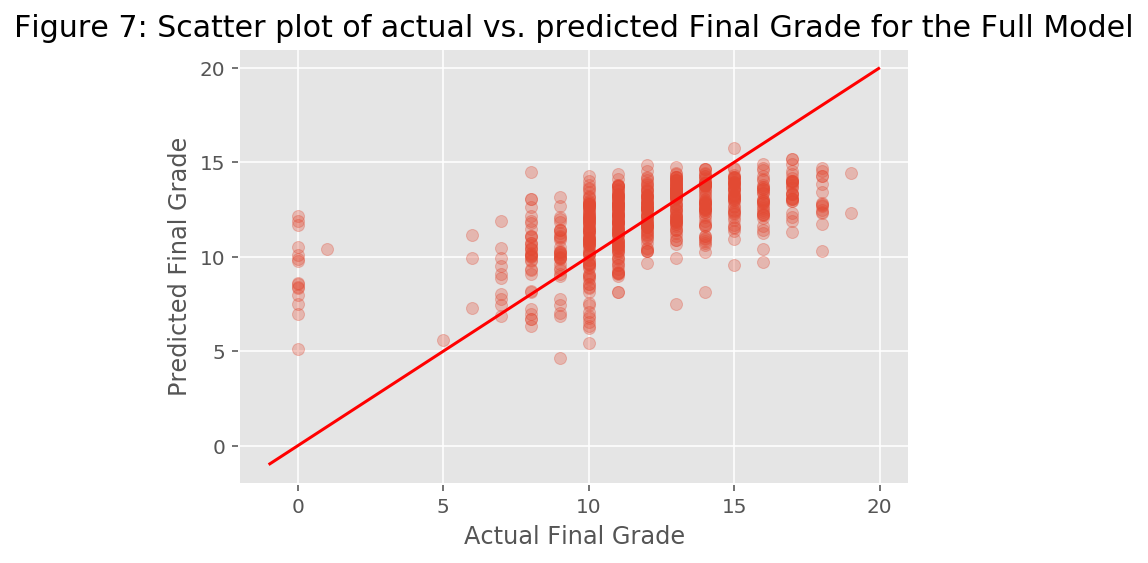

In [32]:
def plot_line(axis, slope, intercept, **kargs):
    xmin, xmax = axis.get_xlim()
    plt.plot([xmin, xmax], [xmin*slope+intercept, xmax*slope+intercept], **kargs)

plt.scatter(residuals_full['actual'], residuals_full['predicted'], alpha=0.3);
plot_line(axis=plt.gca(), slope=1, intercept=0, c="red");
plt.xlabel('Actual Final Grade');
plt.ylabel('Predicted Final Grade');
plt.title('Figure 7: Scatter plot of actual vs. predicted Final Grade for the Full Model', fontsize=15);
plt.show();

From `Figure 7`, we observe that the model never produces a prediction above 16 even though the highest final grade in the dataset is 19.

We will now check the diagnostics for the full model.

## Full Model Diagnostic Checks


We would like to check whether there are indications of violations of the regression assumptions, which are
1. linearity of the relationship between target variable and the independent variables
2. constant variance of the errors
3. normality of the residual distribution
4. statistical independence of the residuals

Let's first get a scatter plot of residuals (as a function of predicted final grades).


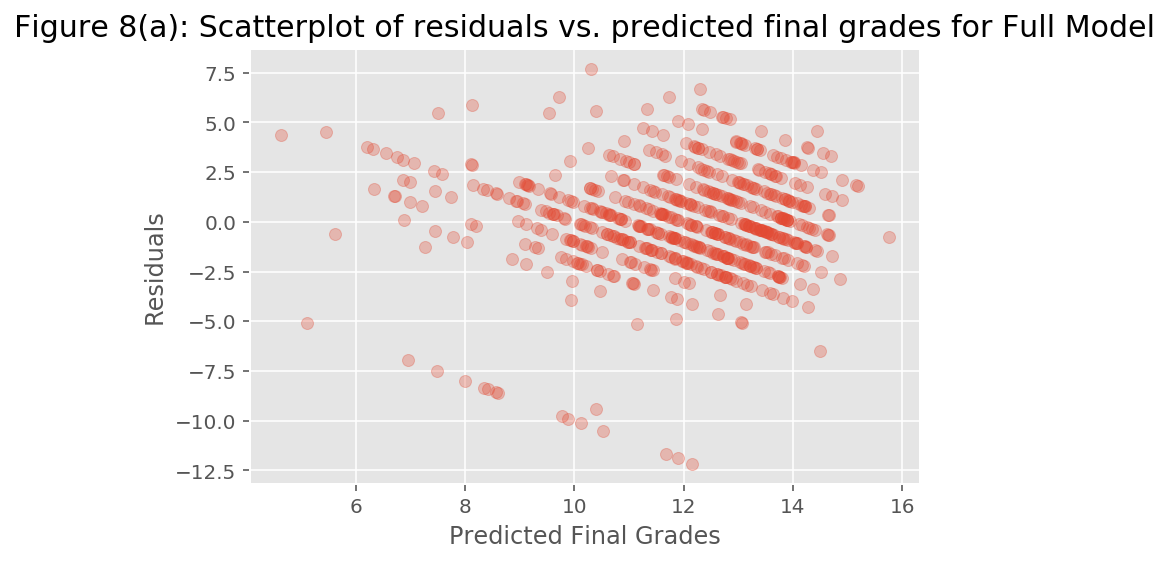

In [33]:
plt.scatter(residuals_full['predicted'], residuals_full['residual'], alpha=0.3);
plt.xlabel('Predicted Final Grades');
plt.ylabel('Residuals')
plt.title('Figure 8(a): Scatterplot of residuals vs. predicted final grades for Full Model', fontsize=15)
plt.show();

<!-- From Figure 10(a), we see that, rather than being mostly random and centered around 0, the residuals exhibit a banding pattern, especially when predicted age is below 50. This pattern indicates that the constant variability assumption of linear regression is not quite satisfied in this case.-->

Let's now plot actual age vs. residuals. 

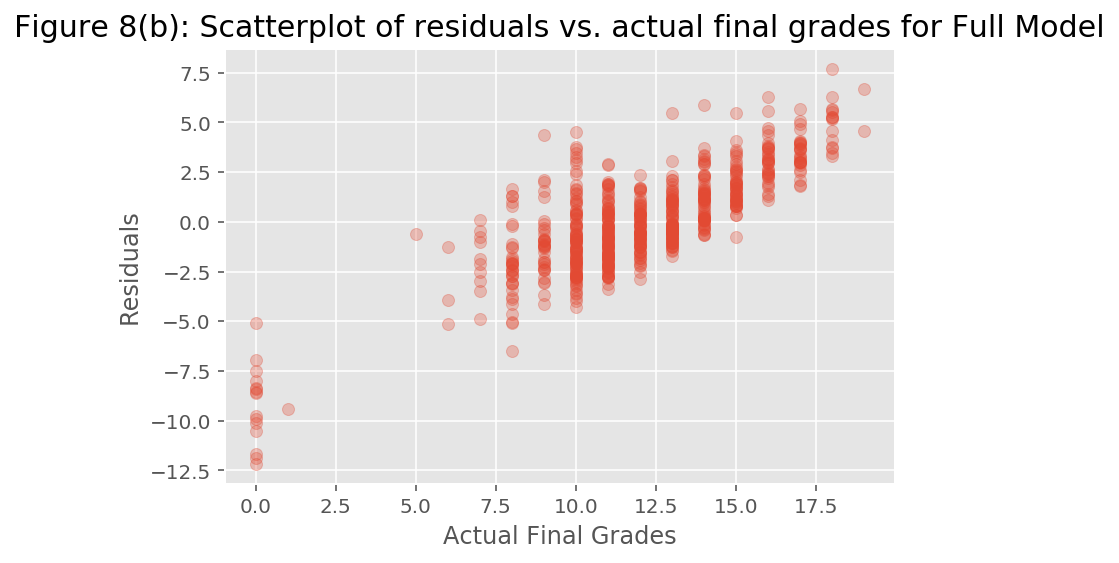

In [34]:
plt.scatter(residuals_full['actual'], residuals_full['residual'], alpha=0.3);
plt.xlabel('Actual Final Grades');
plt.ylabel('Residuals')
plt.title('Figure 8(b): Scatterplot of residuals vs. actual final grades for Full Model', fontsize=15)
plt.show();

We notice that the model overestimates lower final grades. In particular, for those with a final grade less than 5, the model predicts much higher final grades.

Let's overlay the histograms of actual vs. predicted final grades on the same plot.

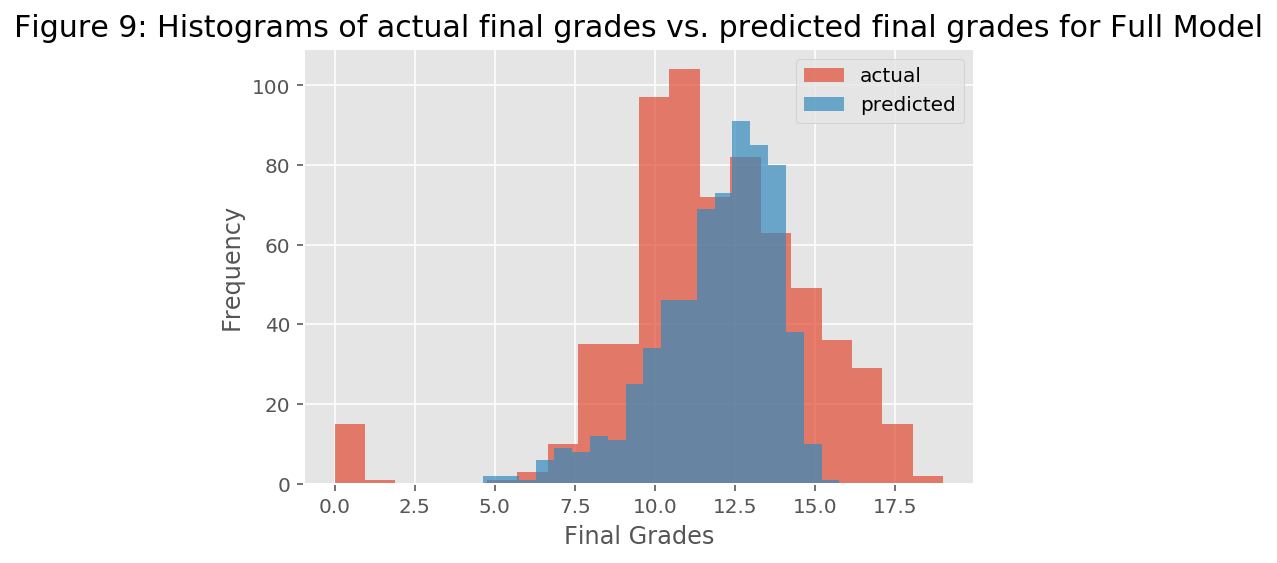

In [35]:
plt.hist(residuals_full['actual'], label='actual', bins=20, alpha=0.7);
plt.hist(residuals_full['predicted'], label='predicted', bins=20, alpha=0.7);
plt.xlabel('Final Grades');
plt.ylabel('Frequency');
plt.title('Figure 9: Histograms of actual final grades vs. predicted final grades for Full Model', fontsize=15);
plt.legend()
plt.show();

We notice that their distributions are quite different. In particular, the model's predictions are highly clustered around mid-13's.

Let's now have look at the histogram of the residuals.

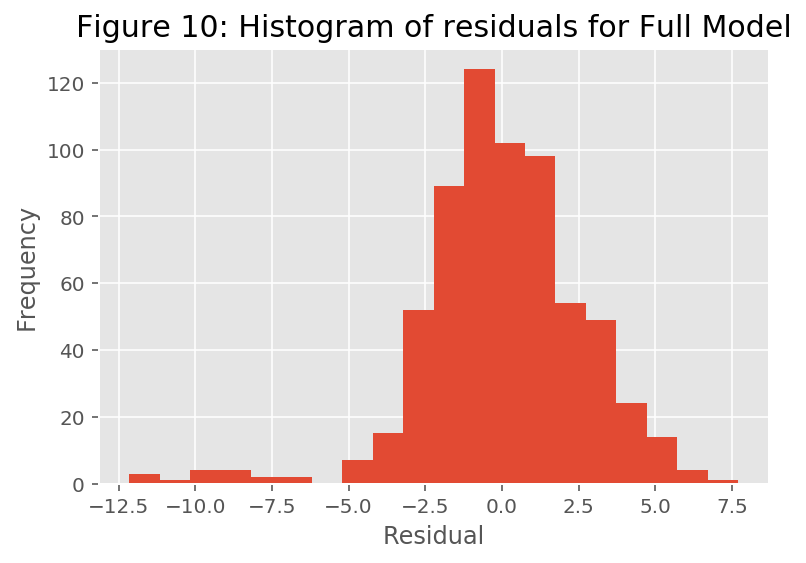

In [36]:
plt.hist(residuals_full['residual'], bins = 20);
plt.xlabel('Residual');
plt.ylabel('Frequency');
plt.title('Figure 10: Histogram of residuals for Full Model', fontsize=15);
plt.show();

From Figure 10, the histogram of residuals looks somewhat symmetric, though slightly left-skewed. Nonetheless, it seems the normality assumption of linear regression is not significantly violated in this particular case.

### Backwards Feature Selection
We now perform backwards feature selection using p-values. It appears Statsmodels does not have any canned code for automatic feature selection, so we wrote one ourselves.

In [37]:
patsy_description = patsy.ModelDesc.from_formula(formula_string_encoded)
linreg_fit = model_fitted
p_val_cutoff = 0.05

print('\nPerforming backwards feature selection using p-values:')

while True:
    pval_series = linreg_fit.pvalues.drop(labels='Intercept')
    pval_series = pval_series.sort_values(ascending=False)
    term = pval_series.index[0]
    pval = pval_series[0]
    if (pval < p_val_cutoff):
        break
    term_components = term.split(':')
    print(f'\nRemoving term "{term}" with p-value {pval:.4}')
    if (len(term_components) == 1): 
        patsy_description.rhs_termlist.remove(patsy.Term([patsy.EvalFactor(term_components[0])]))    
    else:
        patsy_description.rhs_termlist.remove(patsy.Term([patsy.EvalFactor(term_components[0]), 
                                                        patsy.EvalFactor(term_components[1])]))    
        
    linreg_fit = smf.ols(formula=patsy_description, data=data_encoded).fit()
    

model_reduced_fitted = smf.ols(formula = patsy_description, data = data_encoded).fit()
    
print("\n***")
print(model_reduced_fitted.summary())
print("***")
print(f"Regression number of terms: {len(model_reduced_fitted.model.exog_names)}")
print(f"Regression F-distribution p-value: {model_reduced_fitted.f_pvalue:.4f}")
print(f"Regression R-squared: {model_reduced_fitted.rsquared:.4f}")
print(f"Regression Adjusted R-squared: {model_reduced_fitted.rsquared_adj:.4f}")


Performing backwards feature selection using p-values:

Removing term "famsup_yes" with p-value 0.958

Removing term "traveltime" with p-value 0.6775

Removing term "famrel" with p-value 0.2995

Removing term "address_U" with p-value 0.3248

Removing term "Medu" with p-value 0.2688

Removing term "paid_yes" with p-value 0.2576

Removing term "freetime" with p-value 0.2651

Removing term "famsize_LE3" with p-value 0.1636

Removing term "internet_yes" with p-value 0.1073

Removing term "absences" with p-value 0.1222

Removing term "romantic_yes" with p-value 0.07934

Removing term "sex_M" with p-value 0.05772

***
                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.318
Model:                            OLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     37.34
Date:                Sun, 01 Nov 2020   Prob (F-statistic):    

Similar to what we did for the full model, let's define a new data frame for actual final grade vs. predicted final grade and the residuals for the reduced model.



In [38]:
residuals_reduced = pd.DataFrame({'actual': data_encoded['G3'], 
                            'predicted': model_fitted.fittedvalues, 
                            'residual': model_fitted.resid})
residuals_reduced.head(10)

,actual,predicted,residual
0,11,12.800059,-1.800059
1,11,13.587117,-2.587117
2,12,11.885661,0.114339
3,14,13.819668,0.180332
4,13,13.298714,-0.298714
5,13,13.506113,-0.506113
6,13,13.409647,-0.409647
7,13,13.389911,-0.389911
8,17,14.140013,2.859987
9,13,13.309535,-0.309535


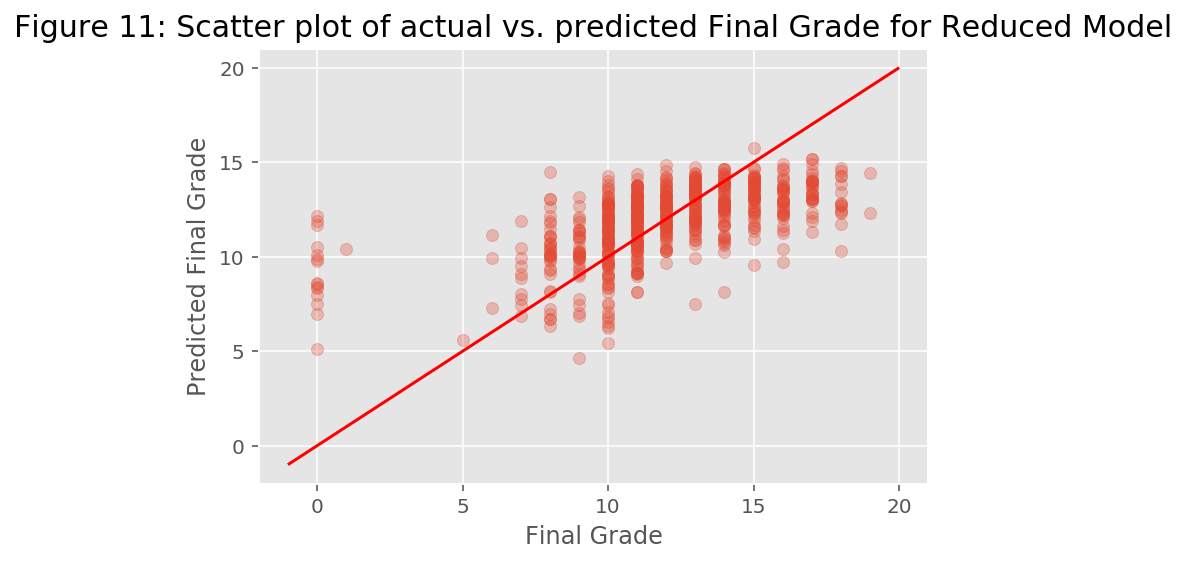

In [39]:
plt.scatter(residuals_reduced['actual'], residuals_reduced['predicted'], alpha=0.3);
plot_line(axis=plt.gca(), slope=1, intercept=0, c="red");
plt.xlabel('Final Grade');
plt.ylabel('Predicted Final Grade');
plt.title('Figure 11: Scatter plot of actual vs. predicted Final Grade for Reduced Model', fontsize=15);
plt.show(); 

This model returns an Adjusted R-squared of 0.3097, meaning the reduced model still explains about 31% of the variance, but with 6 less variables. Looking at the p-values, they are all significant at the 5% level, as expected. From Figure 11, we still have the same issues with our model. That is, the model overestimates higher grades and underestimates lower grades. We will now perform the diagnostic checks on this reduced model.






### Reduced Model 

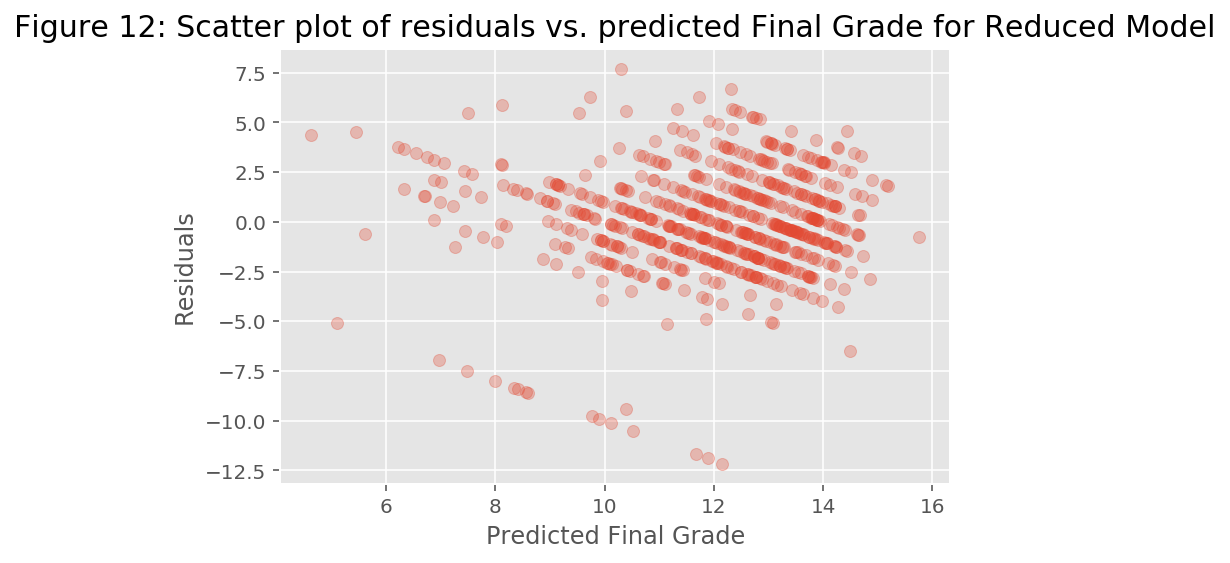

In [40]:
plt.scatter(residuals_reduced['predicted'], residuals_reduced['residual'], alpha=0.3);
plt.xlabel('Predicted Final Grade');
plt.ylabel('Residuals')
plt.title('Figure 12: Scatter plot of residuals vs. predicted Final Grade for Reduced Model', fontsize=15)
plt.show();

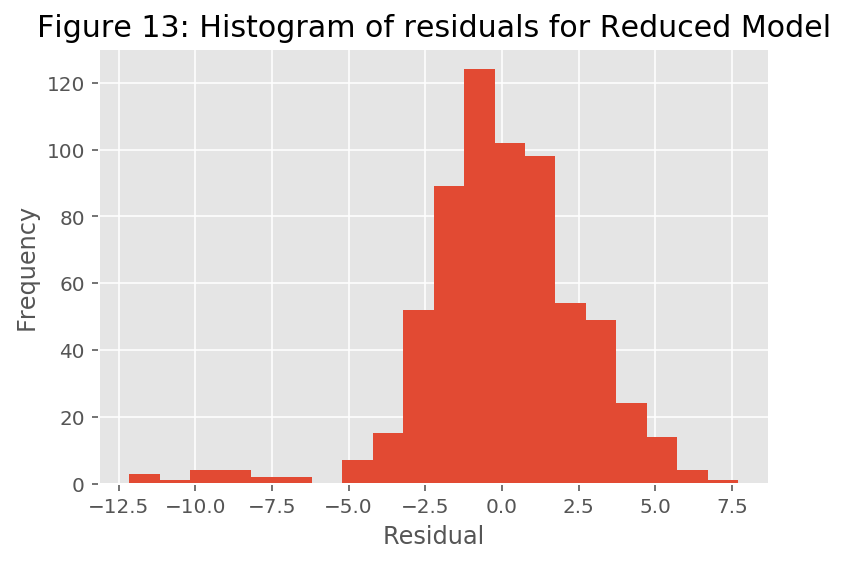

In [41]:
plt.hist(residuals_reduced['residual'], bins = 20);
plt.xlabel('Residual');
plt.ylabel('Frequency');
plt.title('Figure 13: Histogram of residuals for Reduced Model', fontsize = 15)
plt.show();


# Summary & Conclusions <a name="Conclusions"></a>

Using our independent variables, we were able to get a full model with an Adjusted R-squared value of about 31%. After backwards variable selection with a p-value cutoff value of 0.05, we were able to maintain the same performance but with 12 less variables. Our final model has 9 variables all together with a model p-value of 0.

## References
- P. Cortez and A. Silva. Using Data Mining to Predict Secondary School Student Performance. In A. Brito and J. Teixeira Eds., Proceedings of 5th FUture BUsiness TEChnology Conference (FUBUTEC 2008) pp. 5-12, Porto, Portugal, April, 2008, EUROSIS, ISBN 978-9077381-39-7. Available at http://archive.ics.uci.edu/ml/datasets/Student+Performance [Accessed 2020-20-07]

- Available at https://www.featureranking.com/tutorials/statistics-tutorials/regression-case-study/ [Accessed 2020-20-07]

- Available at https://www.featureranking.com/tutorials/machine-learning-tutorials/data-preparation-for-machine-learning/ [Accessed 2020-20-07]